In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from count_view_Reaction import *
from step1_to_4 import *

In [2]:
# Change working directory
os.chdir('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/')

# <span style="color:blue"> Search data on Reaxys </span>

#### ketone in chain
- Draw as shown
<img src="Reaxys_Raw data/ketone_in_chain_search.png" width="400" height="180">
- Choose ‘as substructure’ then ‘On all atoms’
- Limit to ‘sodium tetrahydroborate’, single-step, article
- Exclude NA yield → **10,868 reactions**

#### ketone in ring
- Draw as shown
<img src="Reaxys_Raw data/ketone_in_ring_search.png" width="400" height="180">
- Choose ‘as substructure’ then ‘On all atoms’
- Limit to ‘sodium tetrahydroborate’, single-step, article
- Exclude NA yield → **11,432 reactions**

#### ketone in cyclopentanone and cyclohexanone
- Draw as shown (similiar to cyclopentanone)
<img src="Reaxys_Raw data/ketone_in_cyclo5,6_search.png" width="400" height="180">
- Choose ‘as substructure’ then ‘On all atoms’
- Limit to ‘sodium tetrahydroborate’, single-step, article
- Exclude NA yield → **5421 reactions** (some of these are included in the dataset above)

# <span style="color:blue"> Import data </span>

- Double check number of reactions

In [3]:
ketone_in_ring = pd.read_excel('Reaxys_Raw data/ketone_in_ring.xlsx')
count_num_reaction(ketone_in_ring)
count_num_row(ketone_in_ring)

Number of Reactions: 11432
Number of Rows: 21137


Because of the searching query, this data includes the reduction of cyclo-5,6-ketone.
Concat both data, then process (including remove duplicates rows)

In [4]:
cyclo_56_ketone = pd.read_excel('Reaxys_Raw data/cyclo5,6.xlsx')
count_num_reaction(cyclo_56_ketone)
count_num_row(cyclo_56_ketone)

Number of Reactions: 5421
Number of Rows: 11834


In [5]:
merged = pd.merge(ketone_in_ring,cyclo_56_ketone, indicator=True, how='outer')

# Get the on only in ketone_ring 
only_ketone_ring = merged[merged['_merge'] == 'left_only'].drop('_merge', axis = 1)
print('Rows only in ketone_in_ring:')
count_num_reaction(only_ketone_ring)
count_num_row(only_ketone_ring)

# then append original cyclo_56_ketone
full_cyclo_ketone = pd.concat([only_ketone_ring, cyclo_56_ketone], ignore_index=True)
print('Rows after appending:')
count_num_reaction(full_cyclo_ketone)
count_num_row(full_cyclo_ketone)

Rows only in ketone_in_ring:
Number of Reactions: 11428
Number of Rows: 21131
Rows after appending:
Number of Reactions: 11617
Number of Rows: 32965


In [6]:
ketone_in_chain= pd.read_excel('Reaxys_Raw data/ketone_in_chain.xlsx')
count_num_reaction(ketone_in_chain)
count_num_row(ketone_in_chain)

Number of Reactions: 10868
Number of Rows: 42306


In [7]:
ketone = pd.concat([ketone_in_chain,full_cyclo_ketone],ignore_index=True)
count_num_reaction(ketone_in_chain)
count_num_row(ketone_in_chain)

Number of Reactions: 10868
Number of Rows: 42306


###  <span style="color:blue"> Step 1: General Cleaning</span>
### <span style="color:blue"> Step 2: Verify reaction by MW</span>
### <span style="color:blue"> Step 3: Verify reaction by change in C-O bonds</span>
### <span style="color:blue"> Step 4: Ensure consistent reaction conditions</span>

In [15]:
ketone_clean_1_to_4 = step_1_to_4(ketone)

STEP 1 - general cleaning:
Number of Reactions: 10498
---------------------------------------


[12:08:02] Explicit valence for atom # 9 N, 4, is greater than permitted
[12:08:02] Explicit valence for atom # 9 N, 4, is greater than permitted


STEP 2 - Verify reaction by change in MW:
Number of Reactions: 9063
---------------------------------------
STEP 3 - Verify reaction by change in C-O bond:
Number of Reactions: 9033
---------------------------------------
STEP 4 - Ensure consistent reaction conditions:
 - After filtering by reagent:
Number of Reactions: 6444
 - After filtering by solvent:
Number of Reactions: 3678
 - After filtering by temperature:
Number of Reactions: 1405
 - After filtering by time:
Number of Reactions: 1399
Number of Rows: 1432


### <span style="color:blue"> Step 5: Inspect duplicate rows </span>

#### Ketone in Ring dataset
<span style="color:salmon"> Reaction ID = 5228268 </span> 
different time, the right time is 0.5
=> Keep the one having time of 0.5 h

<span style="color:salmon"> Reaction ID = 2227545 </span> 
Same reaction, different reacting time with 2 different yields 
--- 1h reaction ~ 90 % &
1.5h reaction ~ 82% (from very old paper)
=> Keep the one having 90% yield

<span style="color:salmon"> Reaction ID = 8974540 </span>
2 references with 2 different time and yield. The one yielding 70% is overall yield including other reaction 
=> Keep the one having 97% yield

<span style="color:salmon"> Reaction ID = 31427347 </span>
2 references with 2 different time and yield. The one yielding 99% having no reaction, or procedure reported.
=> Keep the one having 100% yield

<span style="color:salmon"> Reaction ID = 5125708 </span>
Same reaction, conditions, 2 reported yields (96% vs 96.3%) from 2 references with same title, same authors but published in 2 different years in 2 different journals. 
=> Both were actually 96%. Keep the one having 96% yield

<span style="color:salmon"> Reaction ID = 10088666</span> 
Not purifying in both paper
=> Remove both

<span style="color:salmon"> Reaction ID =  4899473, 40358815, 26019020, 26019012, 35575077, 2451291,  2839467 </span> 
Same reaction, conditions, yield, but different journals
=> keep 1, no matter which

<span style="color:salmon"> Reaction ID = 50834932 </span> 
Same reaction, different reacting time with 2 different yields.
The one yielding 94% have no procedure reported 
=> Keep the one having 96% yield

<span style="color:salmon"> Reaction ID = 5103599 </span> 
Same reaction, different reacting time with 2 different yields 
--- 12h reaction ~ 83% (no procedure reported)
0.5h reaction ~ 96.7% 
=> keep one yielding 83%

<span style="color:salmon"> Reaction ID = 1159290 </span> 
Same reaction, conditions, 2 references reported 2 different yields
=> Too different. Remove both

<span style="color:salmon"> Reaction ID = 32575260 </span> 
Same yield reported (2 references) for same reaction of same reaction conditions.
Check the literatures: the yields are actually 74% and 23% (not 73 and 24) for both. 
Note for later if needed because this difference does not affect the sum for now.
=> keep 1, no matter which

#### Ketone in Chain dataset
<span style="color:salmon"> Reaction ID = 578384 </span>
Difference references.
Reaction of 64%% yield is defined by LCMS
The one of 95% has no purification step
=> keep the one of 64% yield

<span style="color:salmon"> Reaction ID = 782191 </span>
Difference references.
Reaction of 27%% yield is defined by LCMS
The other one is 63% 
=> Too different, remove

<span style="color:salmon"> Reaction ID = 39265034 </span>
Difference references.
Reaction of 90% yield having wrong temperature
The one of 100% have no purification step 
=> Keep the one having 100 % for now

<span style="color:salmon"> Reaction ID = 1985375 </span>
Difference references, the right reaction is 0.5 h and 80 %. The other one has no procedure reported
=> Keep the one having 80 %

<span style="color:salmon"> Reaction ID = 2163086 </span>
Difference references, the right reaction is 1.5 h and 95 %. The other one has no procedure reported
=> Keep the one having 95 %

<span style="color:salmon"> Reaction ID = 2163086 </span>
Same reference
The right reaction is 1h and 67%
=> Keep the one having 67%

<span style="color:salmon"> Reaction ID = 997369 </span>
The reaction of 0.5h and 90% yield. the time was wrongly reported, it's actually 2/3 h. The other 2 are correct. 
Keep the one having 2/3h and 90%. 
=> Keep the one having 2/3 h reacting time, no need to update the other one. 

<span style="color:salmon"> Reaction ID = 855977 </span>
The reaction having 960% yield. no detailed procedure reported
=> Keep the one having 100%

<span style="color:salmon"> Reaction ID = 2532675 </span>
Exact same reference.
=> Keep the one having the right yield which is 47 percent; 45 percent

<span style="color:salmon"> Reaction ID =  34623882, 34623878, 34623890, 4551209,46506389, 38244374  </span> 
Same reaction, conditions, yield, but different journals
=> keep 1, no matter which


#### Based on comments above, handle duplicated rows and update yields. Note for later when verifying reactions with literatures.

In [16]:
id_toremove = [10088666, 1159290, 782191]
id_tokeep1_nomatter = [4899473, 40358815, 26019020, 26019012, 35575077, 2451291, 2839467, 32575260,34623882, 34623878, 34623890, 4551209,46506389, 38244374]
id_tokeep1_condition = [5228268, 8974540, 31427347, 5125708, 50834932, 5103599,2227545,855977, 2163086,2104996,1985375, 39265034, 578384, 78219,2532675,997369]
conditions = [
    (5228268, 'Time (Reaction Details) [h]', 0.5),
    (8974540, 'Yield (number)', 97),
    (31427347, 'Yield (number)', 100),
    (5125708, 'Yield (number)', 96),
    (50834932, 'Yield (number)', 96),
    (5103599, 'Yield (number)', 83),
    (2227545, 'Yield (number)', 90),

    (855977, 'Yield (number)', 100),
    (2163086, 'Yield (number)', 67),
    (2104996, 'Yield (number)', 95),
    (1985375, 'Yield (number)', 80),
    (39265034, 'Yield (number)', 100),
    (578384, 'Yield (number)', 64),
    (2532675, 'Yield', '47 percent; 45 percent'),
    (997369, 'Time (Reaction Details) [h]', 0.666667)

]

# Keep 1 no matter
remove_duplicate = pd.concat([
    ketone_clean_1_to_4[ketone_clean_1_to_4['Reaction ID'].isin(id_tokeep1_nomatter)].drop_duplicates(subset=['Reaction ID']),
    ketone_clean_1_to_4[~ketone_clean_1_to_4['Reaction ID'].isin(id_tokeep1_nomatter)]
])
# Remove rows with 'Reaction ID' in id_toremove
remove_duplicate = remove_duplicate[~remove_duplicate['Reaction ID'].isin(id_toremove)]

# Keep 1 with condition
not_conditions = remove_duplicate[~remove_duplicate['Reaction ID'].isin(id_tokeep1_condition)]
condition_rows = [remove_duplicate[(remove_duplicate['Reaction ID'] == id) & (remove_duplicate[col] == val)] for id, col, val in conditions]
remove_duplicate = pd.concat([not_conditions] + condition_rows)

count_num_reaction(remove_duplicate)
count_num_row(remove_duplicate)



Number of Reactions: 1396
Number of Rows: 1396


#### <span style="color:salmon"> Verify duplicated rows by reaction SMILES </span> 

There are 2 reaction are the same but were assigned to different ID: 48228963 and 48228690
Everything else are the same -> keep 1

In [17]:
remove_duplicate = remove_duplicate.drop_duplicates( subset = 'Reaction')
count_num_reaction(remove_duplicate)
count_num_row(remove_duplicate)

Number of Reactions: 1395
Number of Rows: 1395


### <span style="color:blue"> Step 6: Manually verification of data </span>

In [18]:
# manually check error data
error_inRing = pd.read_excel('error and procedure/ketonInRing_error.xlsx')
error_inChain = pd.read_excel('error and procedure/ketonInChain_error.xlsx')
error_concat = pd.concat([error_inRing, error_inChain],ignore_index=True)
count_num_reaction(error_concat)
count_num_row(error_concat)

Number of Reactions: 482
Number of Rows: 487


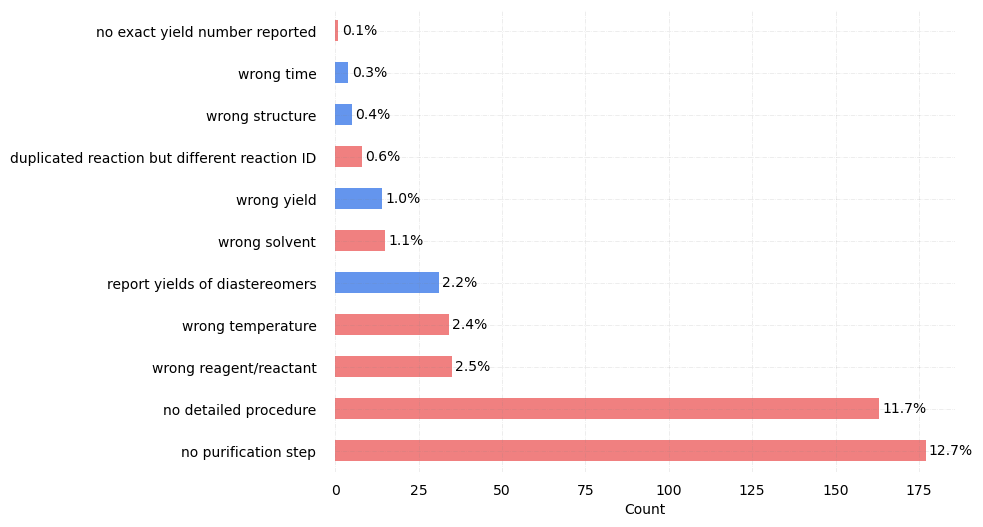

In [19]:
error_counts = error_concat['Error'].value_counts()

# Plot the stats of error
plt.figure(figsize=(8, 6))
ax = error_counts.plot(kind='barh', color=[
    'lightcoral' if error in [
        'wrong solvent', 'wrong temperature', 'duplicated reaction but different reaction ID', 
        'no exact yield number reported', 'no time reported', 'requesting','no purification step', 'no detailed procedure',
        'wrong reagent/reactant'
    ] else 'cornflowerblue' for error in error_counts.index
])
# Add labels and percentages
plt.xlabel('Count')
total = remove_duplicate.shape[0]
for i, count in enumerate(error_counts):
    ax.text(count + 1, i, f'{(count / total * 100):.1f}%', va='center')

# Customize the plot
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
ax.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

plt.show()

In [20]:
manual_check = remove_duplicate
# Update/Remove reactions having error

for idx, row in error_concat.iterrows():
    # remove rows having these error
    if row['Error'] in ['wrong solvent', 'wrong temperature', 'duplicated reaction but different reaction ID', 
        'no exact yield number reported', 'requesting','no purification step', 'no detailed procedure',
        'wrong reagent/reactant']:
        countrow = manual_check.shape[0]
        manual_check = manual_check.drop(manual_check[manual_check['Reaction ID'] == row['Reaction ID']].index)
    # update wrong yield
    elif row['Error'] in ['wrong yield' , 'report yields of diastereomers']:
        manual_check.loc[manual_check['Reaction ID'] == row['Reaction ID'], 'Yield'] = row['actual']
    # update yield (number)
        manual_check['Yield'] = manual_check['Yield'].astype(str)
        manual_check['Yield (number)'] = manual_check['Yield'].apply(extract_yield)
        manual_check['Yield (number)'] = pd.to_numeric(manual_check['Yield (number)'], errors='raise')
    # update time 
    elif row['Error'] == 'wrong time':
        manual_check.loc[manual_check['Reaction ID'] == row['Reaction ID'], 'Time (Reaction Details) [h]'] = row['actual']
    # update structure
    elif row['Error'] == 'wrong structure':
        manual_check.loc[manual_check['Reaction ID'] == row['Reaction ID'], 'Reaction'] = row['actual']

count_num_reaction(manual_check)

Number of Reactions: 962


In [21]:
inRing_procedure = pd.read_excel('error and procedure/ketonInRing_procedure.xlsx')
inChain_procedure = pd.read_excel('error and procedure/ketonInChain_procedure.xlsx')
procedure = pd.concat([inRing_procedure,inChain_procedure],ignore_index=True)

# Add 'Procedure' for each reaction
clean_reduction_ketone = manual_check.merge(procedure, on='Reaction ID')
count_num_reaction(clean_reduction_ketone)

Number of Reactions: 962


#### extract reactant and product again

In [22]:
clean_reduction_ketone = getReactandProduct(clean_reduction_ketone)
clean_reduction_ketone['Reactant MW'] = clean_reduction_ketone.apply(lambda x: round(get_largest_reactant_MW( x['Reactant SMILES']),3), axis=1)

----------
## <span style="color:blue"> Histogram of Yield (number) </span>

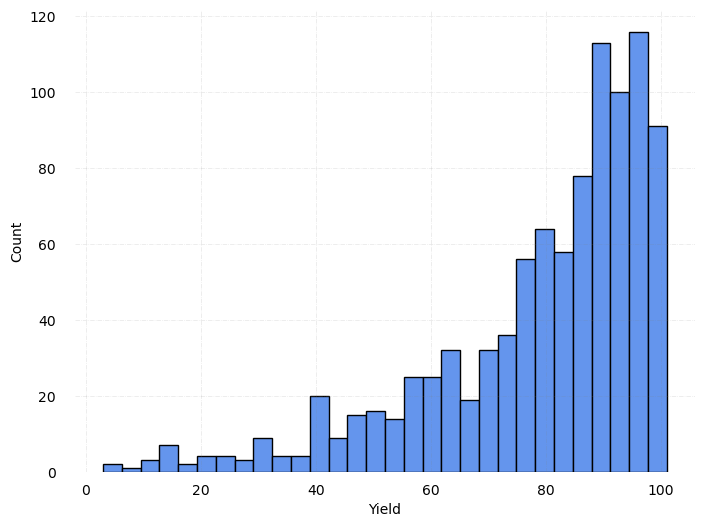

Statistic of Yield:


count    962.000000
mean      79.052599
std       19.219174
min        3.000000
25%       70.225000
50%       85.000000
75%       93.000000
max      101.000000
Name: Yield (number), dtype: float64

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(clean_reduction_ketone['Yield (number)'], bins=30, color='cornflowerblue', edgecolor='black')
plt.xlabel('Yield')
#plt.xticks(np.arange(0, 100, step=10))
plt.ylabel('Count')

# Customize 
ax = plt.gca()  
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
ax.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

plt.show()

print('Statistic of Yield:')
manual_check['Yield (number)'].describe()

-----
## <span style="color:blue"> Save data </span>

In [24]:
clean_reduction_ketone.to_excel('ReductionKetone_6stepCleaning.xlsx', index=False)